In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt



identifier = '1000'
# folder = '/nfs/dust/belle2/user/khanmuni/wavedumpdata/'
folder = 'wavedumpdata/'


def get_record_length(filename, pattern='RECORD_LENGTH'):
    with open(filename) as f:
        for line in f:
            if not line.lstrip().startswith('#') and pattern in line:
                print ('first str', int(line.split()[1]))
                return int(line.split()[1]) #split and return second entry
    print('Could not find file {} or could not find pattern {} in file.'.format(filename, pattern))
    return -1


def read_waveforms(waveforms, cfg, n):
    
    # get record length from config file, return -1 if there was a problem
    recordlength = get_record_length(cfg)
    if recordlength < 0:
        return None

    # read the waveform files (one entry per line, this is not a csv file)
    arr = pd.read_csv(waveforms, header=None).to_numpy()
    nlines_in_arr = len(arr)
    print ('record length from cfg', recordlength, 'length of waveform', nlines_in_arr)
    
    # discard last event in case it was incomplete
    nevents = int(np.floor(nlines_in_arr/recordlength))
    print ('nevents nsig/sconf',nevents)
    arr = arr[:(nevents*recordlength),:]
    print ('waveform shape before', arr. shape)
    newarr = arr.reshape(nevents, recordlength)
    print ('waveform shape after', newarr.shape)
    return arr, arr.reshape(nevents, recordlength)



first str 15000
record length from cfg 15000 length of waveform 15000000
nevents nsig/sconf 1000
waveform shape before (15000000, 1)
waveform shape after (1000, 15000)
Input shape CsI(Tl):  (1000, 15000)
--------------------------------------------------
first str 15000
record length from cfg 15000 length of waveform 15000000
nevents nsig/sconf 1000
waveform shape before (15000000, 1)
waveform shape after (1000, 15000)
Input shape CsI(pure):  (1000, 15000)


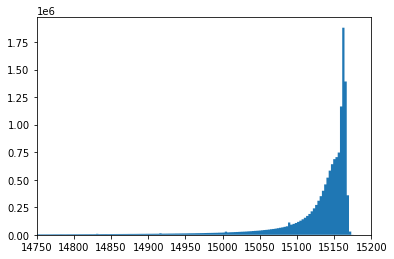

In [7]:
configfilename = os.path.join(folder, 'Config_' + identifier + '.txt')
filename_Tl = os.path.join(folder, 'wavedump_' + identifier + '.txt')
filename_pure = os.path.join(folder, 'wavedump1_' + identifier + '.txt')

sig_raw_Tl , sig_Tl = read_waveforms(waveforms = filename_Tl, cfg=configfilename, n=None)
print('Input shape CsI(Tl): ', sig_Tl.shape)
print ('--------------------------------------------------')
plt.hist( sig_raw_Tl, 5000, histtype= 'stepfilled')
plt.xlim(14750,15200)


sig_raw_pure , sig_pure = read_waveforms(waveforms = filename_pure, cfg=configfilename, n=None)
print('Input shape CsI(pure): ', sig_pure.shape)

In [10]:
np.arange(0, len(sig_raw[20]))*2e-6

array([0.0000e+00, 2.0000e-06, 4.0000e-06, ..., 2.9994e-02, 2.9996e-02,
       2.9998e-02])

(1720, 15000) (15000,)


(1720, 15000) (15000,)


(1000, 15000) (15000,)


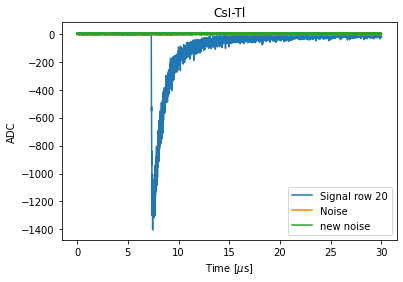

In [14]:

plt.plot(np.arange(0, len(sig_raw[20]))*0.002, sig_raw[20], label = 'Signal row 20')#, s=1, marker='o')
plt.plot(np.arange(0, len(noise_raw[20]))*0.002, noise_raw[20], label = 'Noise ')#, s=1, marker='o')
plt.plot(np.arange(0, len(noise_raw_1[20]))*0.002, noise_raw_1[20], label = 'new noise')#, s=1, marker='o')
# plt.plot(np.arange(0, len(noise_raw[20]))*0.002, noise_raw[100], label = 'Noise row 100')#, s=1, marker='o')
plt.title("CsI-Tl")
plt.ylabel("ADC")
plt.xlabel("Time [$\mu$s]")
plt.legend()
# plt.yscale('log')
# plt.xlim(0,30)
# plt.ylim(0,-150)

[ 5.20684211  6.20684211 -5.79315789 ... -3.79315789  0.20684211
 -1.79315789]


(3000.0, 5000.0)

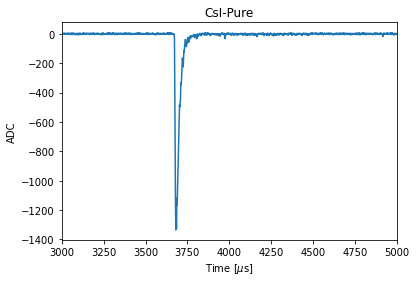

In [19]:
sig_raw_puRE = sig_raw_pure.reshape(1000,15000)
sig_praw_mean = np.expand_dims(sig_raw_puRE[:,100:2000].mean(axis=1), axis=1)
# sig_raw_mean = sig_raw_puRE.mean(axis=1)
sig_praw= sig_raw_puRE-sig_praw_mean
print(sig_praw[20])
plt.plot(np.arange(0, len(sig_praw[20])), sig_praw[20])
plt.title("CsI-Pure")
plt.ylabel("ADC")
plt.xlabel("Time [$\mu$s]")
plt.xlim(3000,5000)

In [79]:
nmin=100
nmax=2000
threshold=25
sig_start = sig_Tl[:,nmin:nmax]
sig_mean = np.expand_dims(sig_start.mean(axis=1), axis=1)
sig_std = np.expand_dims(sig_start.std(axis=1), axis=1)
sig_corrected = sig_Tl - sig_mean

In [80]:
def findT0(data, std, threshold=3.0):
    idxA = np.argmax(sig_corrected<-(threshold*std), axis=1)    
    return idxA, data[np.arange(len(idxA)),idxA]

In [81]:
t0, t0_val = findT0(sig_corrected, sig_std, threshold=threshold)

[0, 15000]
(15000,)


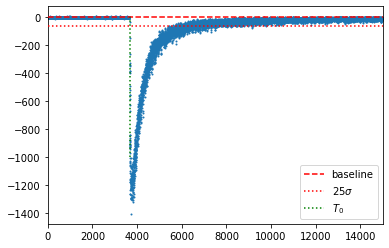

In [82]:
# plot waveform
idx=20
xrange=[0,len(sig_corrected[idx])]
print (xrange)
# plt.hlines(sig_mean[0], 0, 15000, color='red', ls='--', zorder=5)
plt.hlines(0, xrange[0], xrange[1], color='red', ls='--', zorder=5, label='baseline')
plt.hlines(-sig_std[idx]*threshold, xrange[0], xrange[1], color='red', ls='dotted', zorder=5, label='{}$\sigma$'.format(threshold))
plt.vlines(t0[idx], -1000, 0, color='green', ls='dotted', zorder=5, label='$T_0$')
print(sig_corrected[idx].shape)
_ = plt.scatter(np.arange(0, len(sig_corrected[idx])), sig_corrected[idx], s=1, marker='o')
plt.xlim(xrange)
plt.legend()

In [83]:
print (sig_raw[20], sig_corrected[20])

[ -1.87842105   0.12157895  -1.87842105 ... -10.87842105  -3.87842105
  -3.87842105] [ -1.87842105   0.12157895  -1.87842105 ... -10.87842105  -3.87842105
  -3.87842105]


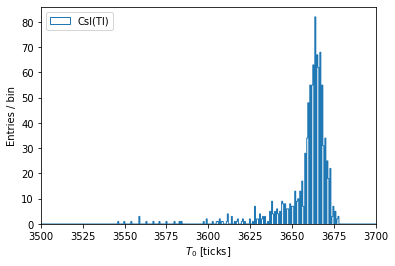

In [87]:

binsmin = 3400
binsmax = 4000
nbins = 1000 #binsmax - binsmin

bins = np.linspace(binsmin,binsmax,nbins)

_ = plt.hist(t0, bins=bins, label='CsI(Tl)', histtype ='step')
plt.gca().set_xlabel(r'$T_0$ [ticks]')
plt.gca().set_ylabel(r'Entries / bin')
plt.legend(loc='upper left')
_=plt.gca().set_xlim(3500, 3700)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(signal))*2e-3, signal, label="Signal", color="blue", alpha=0.5)
# ax.plot(np.arange(len(signal))*2e-3, amp_withdelay*np.roll(template, int(t0_withdelay*fs)), 
#         label="Trial - not yet optimized", color="red", linestyle="dotted")
ax.set_ylabel("Light output [ADC]")
ax.set_xlabel("Time [$\mu$s]")
# ax.set_xlim(0,15000)
ax.set_title("CsI Tl")
# lgd = ax.legend(loc="lower right")
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig = ax.get_figure()
fig.savefig("plots/Csi_pulse.png", dpi=200,  bbox_inches='tight')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(signal))*2e-3, signal, label="Tl Pulse", color="blue", alpha=0.5)
ax.plot(np.arange(len(signal))*2e-3, amp_withdelay*np.roll(template, int(t0_withdelay*fs)), 
        label="Preliminary Fit", color="red", linestyle="dotted")
ax.set_ylabel("Light output [ADC]")
ax.set_xlabel("Time [$\mu$s]")
# ax.set_xlim(0,15000)
ax.set_title("CsI Tl")
lgd = ax.legend(loc="lower right")
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig.tight_layout()